In [ ]:
## lo básico
import pandas as pd
import numpy as np

## visualización
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## pre procesado
from sklearn.model_selection import train_test_split
#from ydata_profiling import ProfileReport

## modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.dummy import DummyClassifier, DummyRegressor




## métricas
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, average_precision_score, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize

## mejora de modelos
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


## automatización
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# 1. Carga de datos

In [ ]:
url = "https://raw.githubusercontent.com/Valeriavinasl/ucm-tfm/main/data/F_E_Encuesta.csv"

df = pd.read_csv(url, sep="\t", engine="python")
df.head()

,edad,is_condicion_fisica,is_camino_realizado_prev,dias,distancia,is_calzado_adecuado,is_tr_mochila,is_reserva_aloj,nota,intensidad_km_dia,...,temporada_Primavera,temporada_Verano,grupo_edad_30-39,grupo_edad_40-49,grupo_edad_50-59,grupo_edad_60-70,is_volver_binaria,is_volver_talvez,is_volver_a_hacer_1.0,is_lesion_1
0,32.0,0,0,5.0,100,0,0,1,9,20.000000,...,0,1,1,0,0,0,1,0,1,1
1,32.0,0,0,5.0,100,0,0,1,9,20.000000,...,0,1,1,0,0,0,1,0,1,0
2,32.0,0,1,6.0,100,1,1,1,8,16.666667,...,1,0,1,0,0,0,1,0,1,1
3,32.0,0,0,6.0,100,1,1,1,9,16.666667,...,1,0,1,0,0,0,1,0,1,0
4,21.0,0,1,6.0,100,1,1,1,10,16.666667,...,0,1,0,0,0,0,1,0,1,1


# 2. Modelado supervisado (clasificación y regresión)
Objetivos

In [ ]:
TARGET_LESION = "is_lesion_1"
TARGET_VOLVER = "is_volver_binaria"
TARGET_NOTA   = "nota"

In [ ]:
exclusion = [TARGET_LESION, TARGET_VOLVER, TARGET_NOTA, "is_volver_talvez", "is_volver_a_hacer_1.0"]

In [ ]:
X = df.drop(columns=[c for c in exclusion if c in df.columns], errors="ignore")
y_lesion = df[TARGET_LESION]
y_volver = df[TARGET_VOLVER]
y_nota   = df[TARGET_NOTA]

In [ ]:
X.head()

,edad,is_condicion_fisica,is_camino_realizado_prev,dias,distancia,is_calzado_adecuado,is_tr_mochila,is_reserva_aloj,intensidad_km_dia,is_experto_senderismo,...,dureza_Suaves,hace_cuanto_Este año,hace_cuanto_Más de 2 años,temporada_Otoño,temporada_Primavera,temporada_Verano,grupo_edad_30-39,grupo_edad_40-49,grupo_edad_50-59,grupo_edad_60-70
0,32.0,0,0,5.0,100,0,0,1,20.000000,0,...,0,0,1,0,0,1,1,0,0,0
1,32.0,0,0,5.0,100,0,0,1,20.000000,0,...,0,0,1,0,0,1,1,0,0,0
2,32.0,0,1,6.0,100,1,1,1,16.666667,0,...,0,0,1,0,1,0,1,0,0,0
3,32.0,0,0,6.0,100,1,1,1,16.666667,0,...,0,1,0,0,1,0,1,0,0,0
4,21.0,0,1,6.0,100,1,1,1,16.666667,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 67 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   edad                                                       2000 non-null   float64
 1   is_condicion_fisica                                        2000 non-null   int64  
 2   is_camino_realizado_prev                                   2000 non-null   int64  
 3   dias                                                       2000 non-null   float64
 4   distancia                                                  2000 non-null   int64  
 5   is_calzado_adecuado                                        2000 non-null   int64  
 6   is_tr_mochila                                              2000 non-null   int64  
 7   is_reserva_aloj                                            2000 non-null   int64  
 8   intensid

In [ ]:
print("X shape:", X.shape)

X shape: (2000, 67)


3. División del dataset

In [ ]:
splits = {
    "lesion": train_test_split(X, y_lesion, test_size=0.2, random_state=42, stratify=y_lesion),
    "volver": train_test_split(X, y_volver, test_size=0.2, random_state=42, stratify=y_volver),
    "nota":   train_test_split(X, y_nota,   test_size=0.2, random_state=42),
}

Clasificación



In [ ]:
def eval_clf(X_train, X_test, y_train, y_test, model, title=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {title} ===")
    print(classification_report(y_test, y_pred, digits=3))
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_proba)
        ap  = average_precision_score(y_test, y_proba)  # PR AUC
        print(f"AUC: {auc:.3f} | AP (PR-AUC): {ap:.3f}")
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(4,4))
        plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
        plt.plot([0,1],[0,1],'--', alpha=.4); plt.legend()
        plt.title(f"ROC - {title}"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Matriz de confusión - {title}"); plt.show()
    return model


--- Baseline (Dummy) - Lesión ---
              precision    recall  f1-score   support

           0      0.948     1.000     0.973       379
           1      0.000     0.000     0.000        21

    accuracy                          0.948       400
   macro avg      0.474     0.500     0.487       400
weighted avg      0.898     0.948     0.922       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/l


=== Lesión - LogisticRegression (balanced) ===
              precision    recall  f1-score   support

           0      0.948     0.670     0.785       379
           1      0.053     0.333     0.092        21

    accuracy                          0.652       400
   macro avg      0.500     0.502     0.438       400
weighted avg      0.901     0.652     0.749       400

AUC: 0.481 | AP (PR-AUC): 0.053


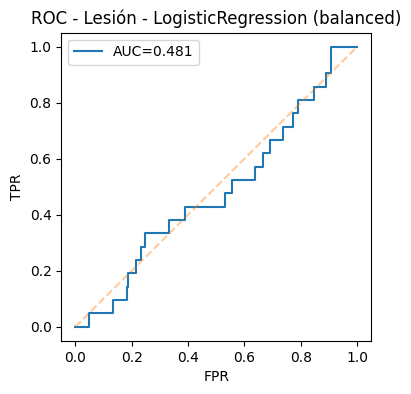

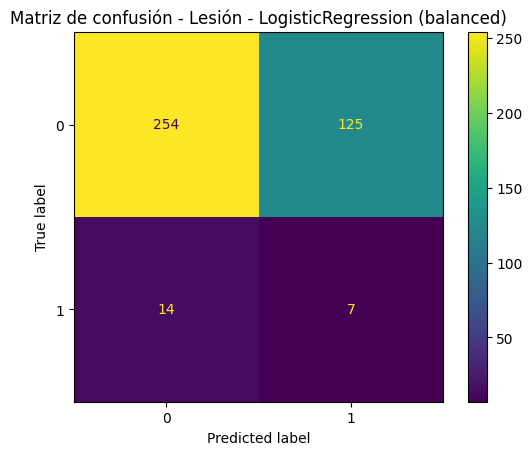


=== Lesión - RandomForest (balanced) ===
              precision    recall  f1-score   support

           0      0.948     1.000     0.973       379
           1      0.000     0.000     0.000        21

    accuracy                          0.948       400
   macro avg      0.474     0.500     0.487       400
weighted avg      0.898     0.948     0.922       400

AUC: 0.578 | AP (PR-AUC): 0.071


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


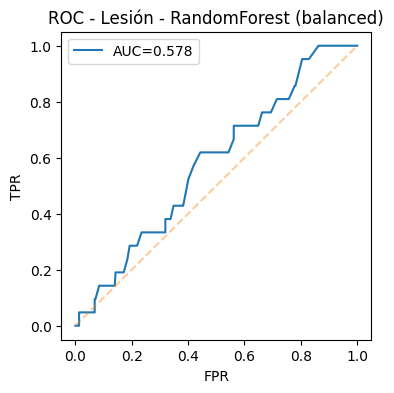

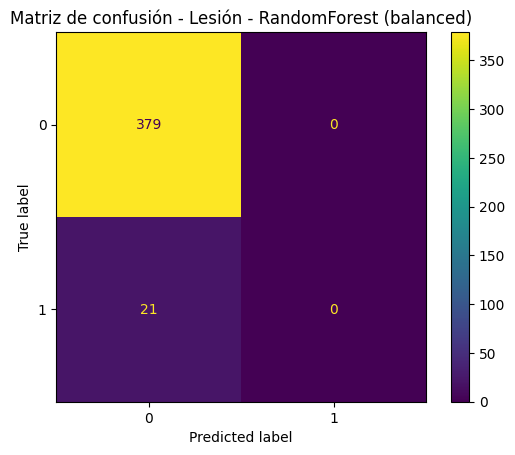

In [ ]:
#  Clasificación: Lesión
Xtr, Xte, ytr, yte = splits["lesion"]
print("\n--- Baseline (Dummy) - Lesión ---")
dummy_lesion = DummyClassifier(strategy="most_frequent").fit(Xtr, ytr)
print(classification_report(yte, dummy_lesion.predict(Xte), digits=3))

logreg_lesion = eval_clf(
    Xtr, Xte, ytr, yte,
    LogisticRegression(max_iter=500, class_weight="balanced"),
    "Lesión - LogisticRegression (balanced)"
)

rf_lesion = eval_clf(
    Xtr, Xte, ytr, yte,
    RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced"),
    "Lesión - RandomForest (balanced)"
)


--- Baseline (Dummy) - Volver ---
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        25
           1      0.938     1.000     0.968       375

    accuracy                          0.938       400
   macro avg      0.469     0.500     0.484       400
weighted avg      0.879     0.938     0.907       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Volver - LogisticRegression (balanced) ===
              precision    recall  f1-score   support

           0      0.087     0.440     0.145        25
           1      0.949     0.691     0.799       375

    accuracy                          0.675       400
   macro avg      0.518     0.565     0.472       400
weighted avg      0.895     0.675     0.758       400

AUC: 0.556 | AP (PR-AUC): 0.946


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


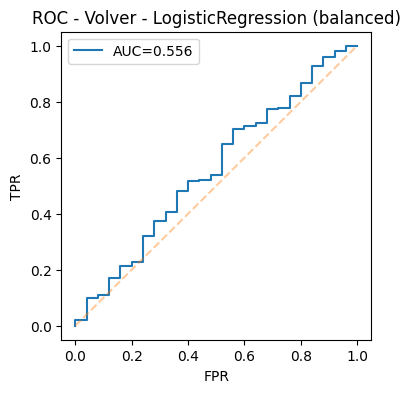

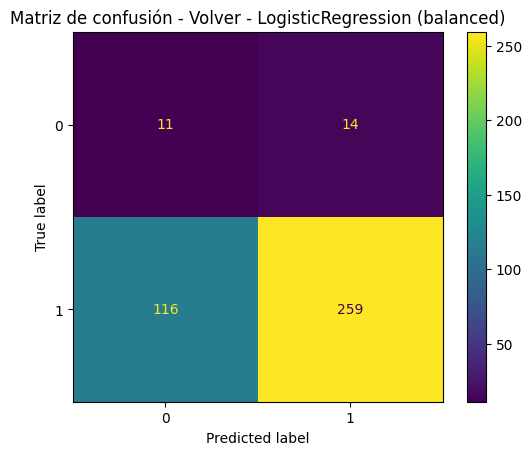


=== Volver - RandomForest (balanced) ===
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        25
           1      0.938     1.000     0.968       375

    accuracy                          0.938       400
   macro avg      0.469     0.500     0.484       400
weighted avg      0.879     0.938     0.907       400

AUC: 0.566 | AP (PR-AUC): 0.946


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


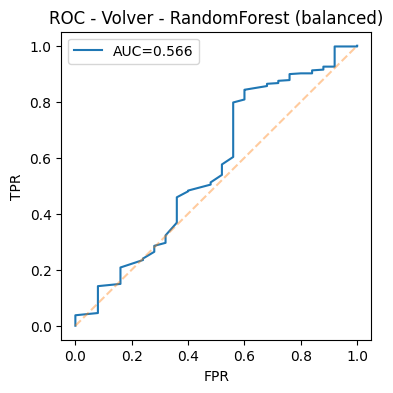

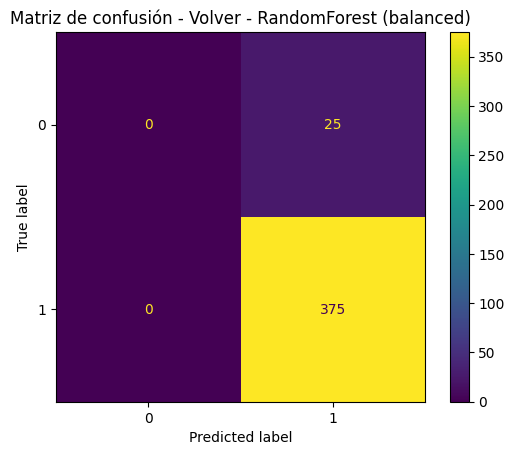

In [ ]:
#  3.5 Clasificación: Volver
Xtr, Xte, ytr, yte = splits["volver"]
print("\n--- Baseline (Dummy) - Volver ---")
dummy_volver = DummyClassifier(strategy="most_frequent").fit(Xtr, ytr)
print(classification_report(yte, dummy_volver.predict(Xte), digits=3))

logreg_volver = eval_clf(
    Xtr, Xte, ytr, yte,
    LogisticRegression(max_iter=500, class_weight="balanced"),
    "Volver - LogisticRegression (balanced)"
)

rf_volver = eval_clf(
    Xtr, Xte, ytr, yte,
    RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced"),
    "Volver - RandomForest (balanced)"
)

regresion

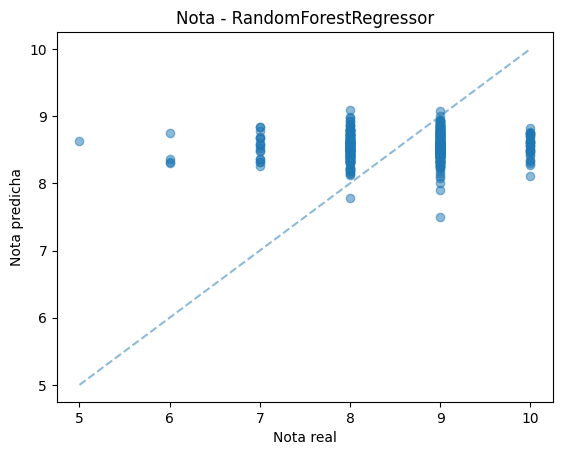

In [ ]:
def eval_reg(X_train, X_test, y_train, y_test, model, title=""):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.scatter(y_test, y_pred, alpha=.5)
    mn, mx = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
    plt.plot([mn,mx],[mn,mx],'--', alpha=.5)
    plt.xlabel("Nota real"); plt.ylabel("Nota predicha"); plt.title(title)
    plt.show()
    return model

Xtr, Xte, ytr, yte = splits["nota"]
model_reg_nota = eval_reg(
    Xtr, Xte, ytr, yte,
    RandomForestRegressor(n_estimators=500, random_state=42),
    "Nota - RandomForestRegressor"
)

In [ ]:
best_lesion = RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced").fit(X, y_lesion)
best_volver = RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced").fit(X, y_volver)
best_nota   = RandomForestRegressor(n_estimators=600, random_state=42).fit(X, y_nota)

In [ ]:
best_lesion.fit(X, y_lesion)
best_volver.fit(X, y_volver)
best_nota.fit(X, y_nota)

RandomForestRegressor(n_estimators=600, random_state=42)

In [ ]:
#  RECOMENDADOR POR SIMILITUD (KNN)
# vecinos sobre el mismo espacio X (está ya 100% numérico)
N_VECINOS = 10
knn = NearestNeighbors(n_neighbors=N_VECINOS, metric="euclidean").fit(X)
indices = knn.kneighbors(X, return_distance=False)

In [ ]:
# dummies de ruta/epoca para convertir medias en recomendación (col más alta)
ruta_cols  = [c for c in X.columns if c.startswith("ruta_")]
epoca_cols = [c for c in X.columns if c.startswith("epoca_")]

In [ ]:
def recom_por_vecinos(df_dummies, idxs, cols, prefijo):
    """Devuelve la etiqueta (sin prefijo) con mayor media entre vecinos."""
    if not cols:
        return np.nan
    sub = df_dummies.iloc[idxs][cols]
    col_top = sub.mean().idxmax()
    return col_top.replace(f"{prefijo}_", "")

ruta_rec, epoca_rec = [], []
for idxs in indices:
    ruta_rec.append(recom_por_vecinos(df, idxs, ruta_cols, "ruta"))
    epoca_rec.append(recom_por_vecinos(df, idxs, epoca_cols, "epoca"))


exportacion

In [ ]:
salida = df.copy()

In [ ]:
salida["prob_lesion_pred"] = best_lesion.predict_proba(X)[:,1]
salida["prob_volver_pred"] = best_volver.predict_proba(X)[:,1]
salida["nota_pred"]        = best_nota.predict(X)

In [ ]:
# Recomendaciones por vecinos
salida["ruta_resalidacom_vecinos"]  = ruta_rec
salida["epoca_recom_vecinos"] = epoca_rec

guardado

In [ ]:
salida.to_csv("Salida.csv", sep="\t",index=False)

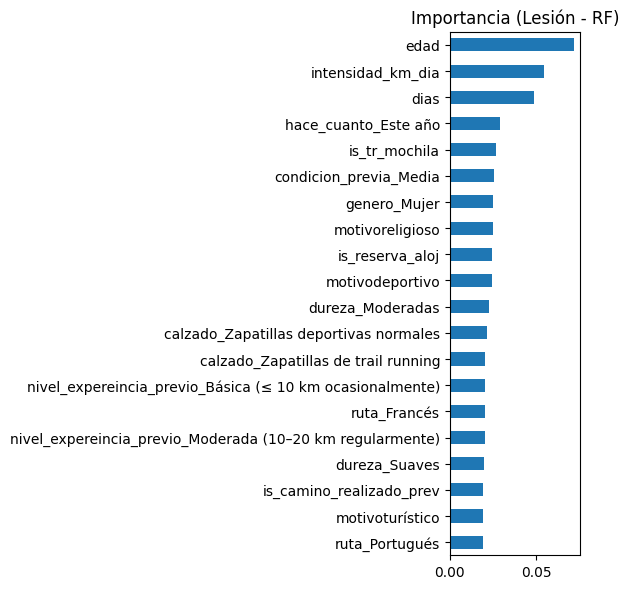

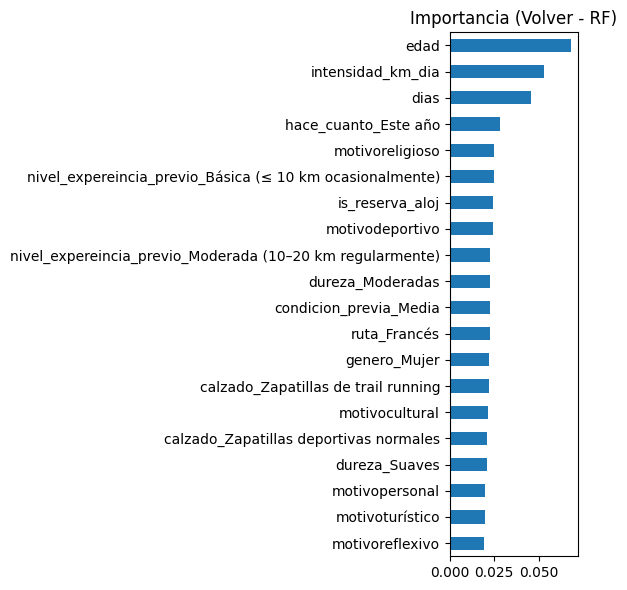

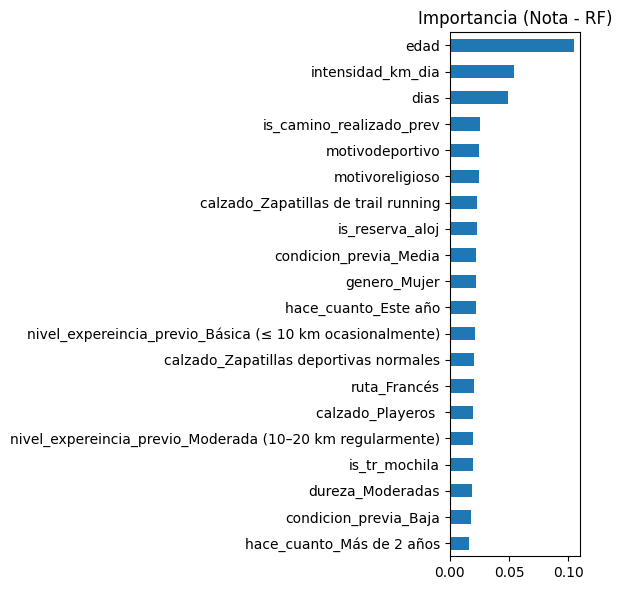

In [ ]:
def plot_importances(model, X, top=20, title="Importancia"):
    if hasattr(model, "feature_importances_"):
        imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:top]
        plt.figure(figsize=(6,6))
        imp.sort_values().plot(kind="barh")
        plt.title(title); plt.tight_layout(); plt.show()

plot_importances(best_lesion, X, title="Importancia (Lesión - RF)")
plot_importances(best_volver, X, title="Importancia (Volver - RF)")
plot_importances(best_nota,   X, title="Importancia (Nota - RF)")